In [1]:
!pip install plotly
!pip install jupyter-dash
import plotly.graph_objects as go
import plotly.offline as po
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.express as px
import dash
import plotly.figure_factory as ff
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np
import datetime as dt
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_ = pd.read_csv("/Users/huseyinefkanalp/Desktop/DataScience/Miuul/FLOMusteriSegmentasyonu/flo_data_20k.csv")

In [27]:
df = df_.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


## Veri Seti Hakkında

#### Veri setindeki toplam gözlem ve değişken sayısı

In [28]:
df.shape

(19945, 12)

#### degiskenler hakkında

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

## Sürekli Değişkenler

In [30]:
df_num=df.select_dtypes(include=["float64"])
df_num.head()

,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online
0,4.0,1.0,139.99,799.38
1,19.0,2.0,159.97,1853.58
2,3.0,2.0,189.97,395.35
3,1.0,1.0,39.99,81.98
4,1.0,1.0,49.99,159.99


In [31]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


## Kategorik Değişkenler

In [32]:
df['order_channel'].unique()

array(['Android App', 'Desktop', 'Mobile', 'Ios App'], dtype=object)

In [33]:
df['order_channel'].value_counts()

Android App    9495
Mobile         4882
Ios App        2833
Desktop        2735
Name: order_channel, dtype: int64

In [34]:
order_channel_group=df.groupby("order_channel").count()
order_channel=order_channel_group.master_id
order_channel=pd.DataFrame(order_channel).rename(columns={"master_id":"total"})
order_channel.T

order_channel,Android App,Desktop,Ios App,Mobile
total,9495,2735,2833,4882


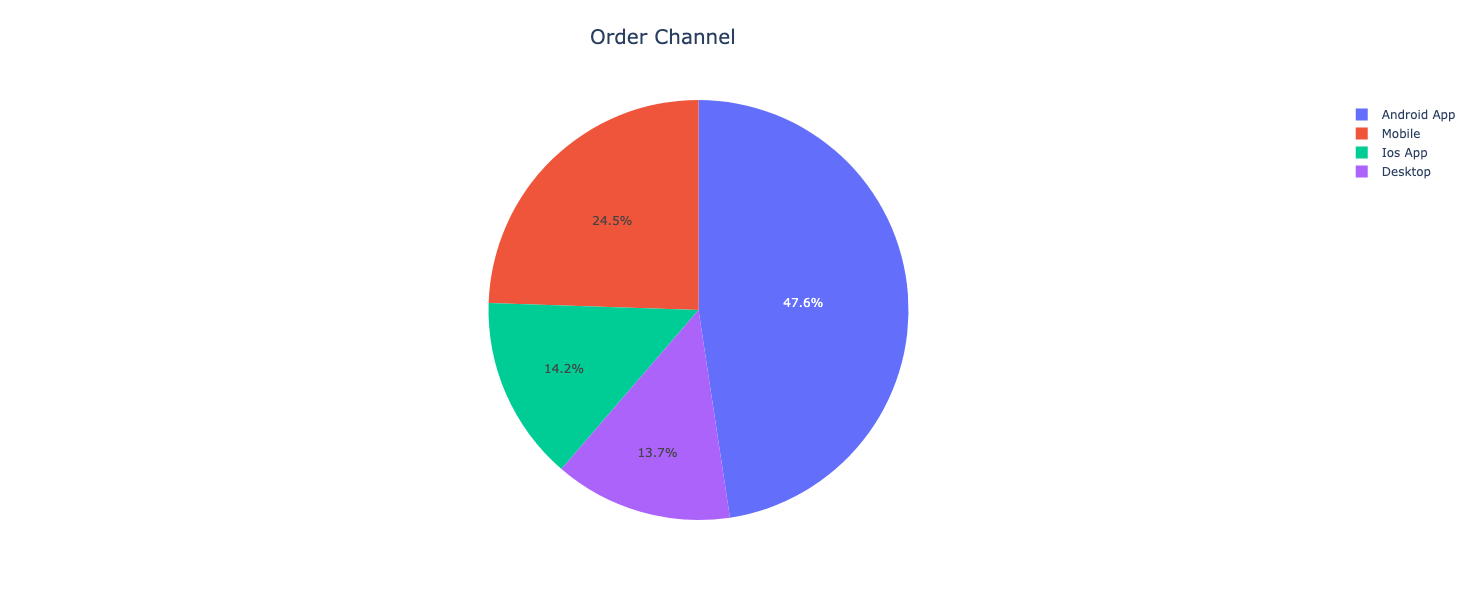

In [35]:
#En çok hangi online kanaldan alışveriş yapılmış pasta dilimi
data = go.Pie(
              values =order_channel.total,
              labels =order_channel.index,
              textinfo = 'percent',
              hoverinfo = 'label+value'
             )

layout = go.Layout(title = dict(text = 'Order Channel', x = 0.45, y = 0.95, font_size = 20),
                  width = 750,
                  height = 600)

fig = go.Figure(data = data, layout = layout)
fig.show()

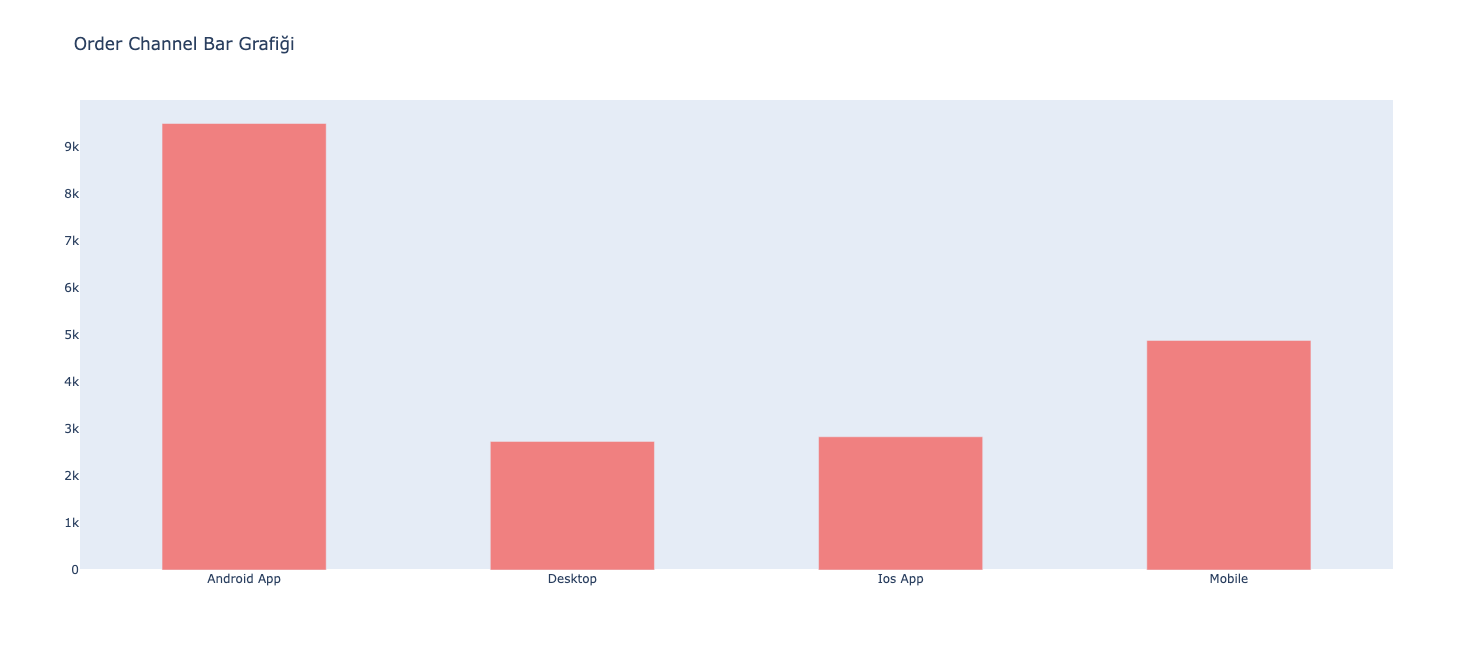

In [36]:
#En çok hangi online kanaldan alışveriş yapılmış bar grafiği
wid = [0.5, ]*10
data = go.Bar(
              x = order_channel.index,
              y = order_channel.total,
              marker = {'color' : 'lightcoral'},
              width = wid
             )

layout = go.Layout( title = 'Order Channel Bar Grafiği',
                    width = 900,
                    height = 650,
                    xaxis = dict(
                                
                                showgrid = False,
                                showline = False,
                                ),
                    yaxis = dict(
                                
                                showgrid = False,
                                showline = False,
                                ),
                  )

fig = go.Figure(data = data, layout = layout)
fig.show()

#### En çok hangi kategorilerden alışveriş yapılmış

In [37]:
df['interested_in_categories_12'].value_counts()

[AKTIFSPOR]                                     3464
[KADIN]                                         2158
[]                                              2135
[ERKEK]                                         1973
[KADIN, AKTIFSPOR]                              1352
[ERKEK, AKTIFSPOR]                              1178
[ERKEK, KADIN]                                   848
[COCUK]                                          836
[ERKEK, KADIN, AKTIFSPOR]                        775
[AKTIFCOCUK]                                     679
[COCUK, KADIN]                                   443
[AKTIFCOCUK, COCUK]                              349
[AKTIFCOCUK, AKTIFSPOR]                          317
[COCUK, AKTIFSPOR]                               317
[COCUK, KADIN, AKTIFSPOR]                        241
[AKTIFCOCUK, ERKEK, COCUK, KADIN, AKTIFSPOR]     223
[ERKEK, COCUK]                                   215
[ERKEK, COCUK, KADIN, AKTIFSPOR]                 213
[AKTIFCOCUK, COCUK, KADIN]                    

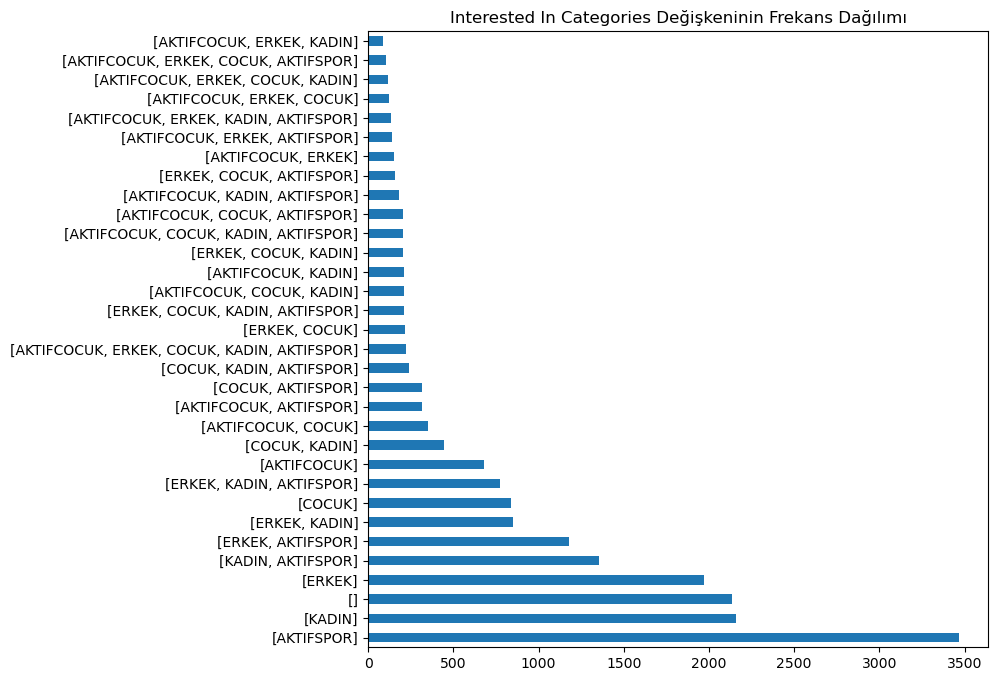

In [38]:
df['interested_in_categories_12'].value_counts().plot.barh(figsize = (8,8)).set_title("Interested In Categories Değişkeninin Frekans Dağılımı");

## Veriyi Hazırlama

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [40]:
#Üstte de göründüğü üzere tarih olması gereken değişkenler object türünde bunu değiştiriyoruz

In [41]:
date_columns = df.columns[df.columns.str.contains("date")]
df[date_columns] = df[date_columns].apply(pd.to_datetime)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

In [42]:
#Analizimizin gerçekçi olması için en son girilen veri tarihine yakın bi zamanı seçmek için son tarihe bakıyoruz (2021-05-30)
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [43]:
today_date = dt.datetime(2021,6,2)
today_date

datetime.datetime(2021, 6, 2, 0, 0)

In [44]:
#Veri setimizin daha doğru sonuçlar vermesi için alışveriş tarihlerinden yeni müşterilere özel değişkenler oluşturuyoruz 
#Örneğin ilk alışverişinden analiz yaptığımız zamana ne kadar zaman geçmiş bu veriye CLTV analizinde müşterinin yaşı denir. "T" olarak ifade edilir
df["T"] = (today_date - df["first_order_date"]).astype('timedelta64[D]').astype(int)
df["hang"] = (df["last_order_date"]-df["first_order_date"]).astype('timedelta64[D]').astype(int)
df["recency"] = (today_date - df["last_order_date"]).astype('timedelta64[D]').astype(int)
df["total_price"] = (df["order_num_total_ever_offline"] + df["order_num_total_ever_online"]) * (df["customer_value_total_ever_online"]+df["customer_value_total_ever_offline"])
df["total_order"] = df["order_num_total_ever_offline"] + df["order_num_total_ever_online"]


In [45]:
#şimdi daha iyi sonuçlar üretmek için biraz daha bağımsız değişken ekleyeceğiz
df["average_order_value"] = df["total_price"]/df["total_order"]
pur_freq = df["total_order"].sum()/df.shape[0]

In [46]:
df["customer_value"] = df["average_order_value"]*pur_freq
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12,T,hang,recency,total_price,total_order,average_order_value,customer_value
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN],215,119,96,4696.85,5.0,939.37,4720.116422
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",1575,1469,106,42284.55,21.0,2013.55,10117.621833
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]",553,366,187,2926.60,5.0,585.32,2941.097271
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]",147,11,136,243.94,2.0,121.97,612.870967
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR],669,582,87,419.96,2.0,209.98,1055.100808


In [107]:
#Şimdi en can alıcı nokta kategorilerimizi farklı değişkenler olacak şekilde veri setimize ekliyoruz.
#Veri setinin ham halinde kategoriler çok kötü gösterilmiş bunları güzel bir şekilde işliyoruz
df["ERKEK"] = df["interested_in_categories_12"].str.contains("ERKEK").values
df["KADIN"] = df["interested_in_categories_12"].str.contains("KADIN").values
df["COCUK"] = df["interested_in_categories_12"].str.contains("COCUK").values
df["AKTIFSPOR"] = df["interested_in_categories_12"].str.contains("AKTIFSPOR").values
df["AKTIFCOCUK"] = df["interested_in_categories_12"].str.contains("AKTIFCOCUK").values
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,...,recency,total_price,total_order,average_order_value,customer_value,ERKEK,KADIN,COCUK,AKTIFSPOR,AKTIFCOCUK
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,...,96,4696.85,5.0,939.37,4720.116422,False,True,False,False,False
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,...,106,42284.55,21.0,2013.55,10117.621833,True,True,True,True,False
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,...,187,2926.60,5.0,585.32,2941.097271,True,True,False,False,False
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,...,136,243.94,2.0,121.97,612.870967,False,False,True,False,True
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,...,87,419.96,2.0,209.98,1055.100808,False,False,False,True,False


In [108]:
date_order = df.groupby(df["last_order_date"].dt.month).agg({"total_order": "sum", "total_price": "sum"})
date_order.reset_index(inplace = True)

In [109]:
for_g = pd.DataFrame()
for_g["gender"] = ["ERKEK","KADIN","COCUK","AKTIFSPOR","AKTIFCOCUK"]
for_g["val"] = [df["ERKEK"].value_counts()[1],df["KADIN"].value_counts()[1],df["COCUK"].value_counts()[1],df["AKTIFSPOR"].value_counts()[1],df["AKTIFCOCUK"].value_counts()[1]]
for_g.head()

,gender,val
0,ERKEK,6642
1,KADIN,7603
2,COCUK,6062
3,AKTIFSPOR,9204
4,AKTIFCOCUK,3437


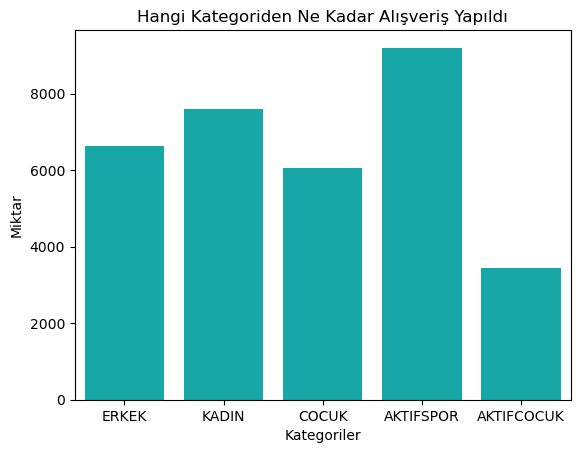

In [111]:
sns.barplot(data=for_g, x='gender', y='val', color='c')
plt.title("Hangi Kategoriden Ne Kadar Alışveriş Yapıldı")
plt.xlabel("Kategoriler")
plt.ylabel("Miktar")
plt.show()

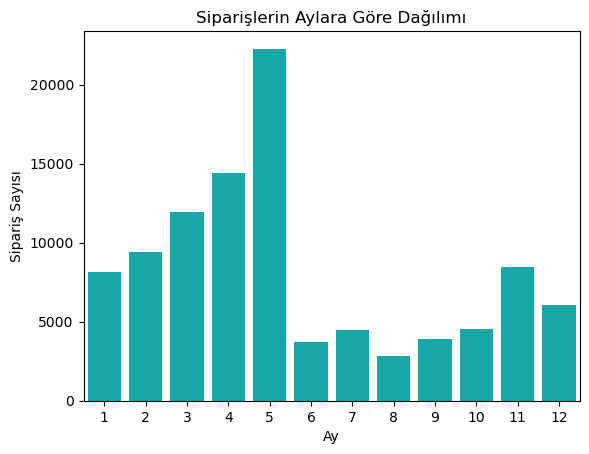

In [112]:
sns.barplot(data=date_order, x='last_order_date', y='total_order', color='c')
plt.title("Siparişlerin Aylara Göre Dağılımı")
plt.xlabel("Ay")
plt.ylabel("Sipariş Sayısı")
plt.show()

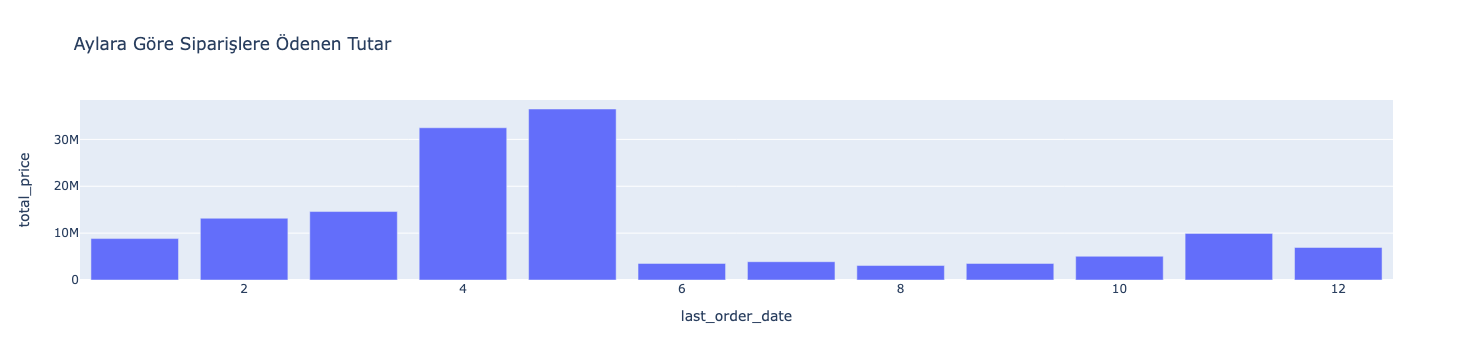

In [113]:
import plotly.express as px



# verileri güzel bir şekilde gösterelim
fig = px.bar(date_order, x='last_order_date', y='total_price', title='Aylara Göre Siparişlere Ödenen Tutar')
fig.show()

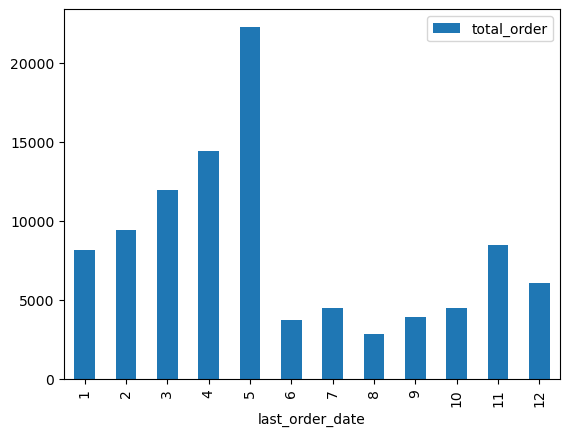

In [114]:
date_order.plot(kind='bar', x='last_order_date', y='total_order')
plt.show()

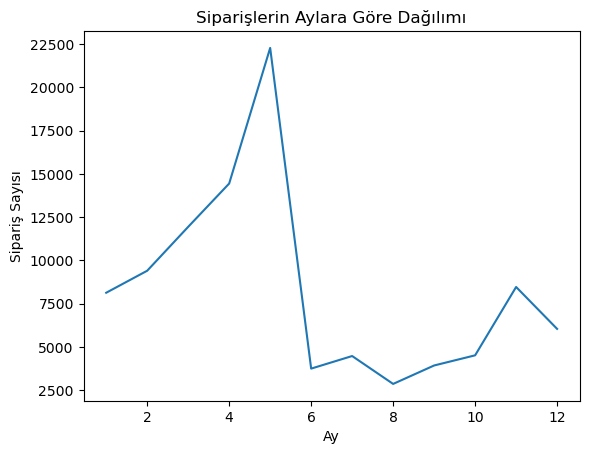

In [115]:
import seaborn as sns

sns.lineplot(data=date_order, x='last_order_date', y='total_order')

# grafik başlığı ekleyebilirsiniz
plt.title("Siparişlerin Aylara Göre Dağılımı")

# x ve y eksenleri için etiketler ekleyebilirsiniz
plt.xlabel("Ay")
plt.ylabel("Sipariş Sayısı")
plt.show()

In [116]:
df["first_order_date"].min()

Timestamp('2013-01-14 00:00:00')

In [117]:
df["last_order_date"].max()

Timestamp('2021-05-30 00:00:00')

In [119]:
#kullanmayacağımız değişkenleri veri setimizden çıkartıyoruz
df = df.drop(["order_channel","last_order_channel","first_order_date","last_order_date",
               "last_order_date_online","last_order_date_offline","interested_in_categories_12"], axis = 1)
df.head()

,master_id,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,T,hang,recency,total_price,total_order,average_order_value,customer_value,ERKEK,KADIN,COCUK,AKTIFSPOR,AKTIFCOCUK
0,cc294636-19f0-11eb-8d74-000d3a38a36f,4.0,1.0,139.99,799.38,215,119,96,4696.85,5.0,939.37,4720.116422,False,True,False,False,False
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,19.0,2.0,159.97,1853.58,1575,1469,106,42284.55,21.0,2013.55,10117.621833,True,True,True,True,False
2,69b69676-1a40-11ea-941b-000d3a38a36f,3.0,2.0,189.97,395.35,553,366,187,2926.60,5.0,585.32,2941.097271,True,True,False,False,False
3,1854e56c-491f-11eb-806e-000d3a38a36f,1.0,1.0,39.99,81.98,147,11,136,243.94,2.0,121.97,612.870967,False,False,True,False,True
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,1.0,1.0,49.99,159.99,669,582,87,419.96,2.0,209.98,1055.100808,False,False,False,True,False


In [120]:
df = df[df["total_price"]>0]

## SVC ile kategorileri tahmin ediyoruz 

In [121]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [122]:
X = df.drop(["master_id","ERKEK"],axis = 1)
y = df["ERKEK"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)

In [123]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [124]:
classifier = SVC(kernel = 'rbf', random_state = 42)
classifier.fit(X_train, y_train)

SVC(random_state=42)

In [125]:
y_pred = classifier.predict(X_test)
accuracy = classifier.score(X_test, y_test)
print("Model accuracy:", accuracy)

Model accuracy: 0.7224784439542812


In [126]:
cm = confusion_matrix(y_test, y_pred)
print(cm) # doğru = 3603 -- yanlış = 1384

[[3115  168]
 [1216  488]]


In [127]:
#Örnek olarak sadece erkek kategorisini tahmin ettik ve 0.72 oranında doğru sonuç verdi bu kodları her biri için tekrar yazmamak adına (don't repeat yourself)
#fonksyonlaştırıyoruz

In [128]:
def prediction_with_svc(df,v1,v2,v3,v4,v5,c_id):
    values = [v1,v2,v3,v4,v5]
    new_df = pd.DataFrame()
    accuray = pd.DataFrame()
    for val in values:
        X = df.drop([c_id,val],axis = 1)
        y = df[val]
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=0)
        sc = StandardScaler()
        X_train = sc.fit_transform(X_train)
        X_test = sc.transform(X_test)
        classifier = SVC(kernel = 'rbf', random_state = 0)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuracy = classifier.score(X_test, y_test)
        print(f"{val} Model accuracy:", accuracy)
        
        new_df[val+"_PREDİCT"] = y_pred
        if val == "ERKEK":
            new_df["ERKEK_ACTUAL"] = y_test.values
        elif val == "KADIN":
            new_df["KADIN_ACTUAL"] = y_test.values
        elif val == "COCUK":
            new_df["COCUK_ACTUAL"] = y_test.values
        elif val == "AKTIFSPOR":
            new_df["AKTIFSPOR_ACTUAL"] = y_test.values
        elif val == "AKTIFCOCUK":
            new_df["AKTIFCOCUK_ACTUAL"] = y_test.values
        else:
            break
    return new_df

In [129]:
new_df= prediction_with_svc(df,"ERKEK","KADIN","COCUK","AKTIFSPOR","AKTIFCOCUK", "master_id")

ERKEK Model accuracy: 0.7224784439542812
KADIN Model accuracy: 0.692600761981151
COCUK Model accuracy: 0.8720673751754562
AKTIFSPOR Model accuracy: 0.7094445558451975
AKTIFCOCUK Model accuracy: 0.8682574694204933


In [130]:
new_df.head()

,ERKEK_PREDİCT,ERKEK_ACTUAL,KADIN_PREDİCT,KADIN_ACTUAL,COCUK_PREDİCT,COCUK_ACTUAL,AKTIFSPOR_PREDİCT,AKTIFSPOR_ACTUAL,AKTIFCOCUK_PREDİCT,AKTIFCOCUK_ACTUAL
0,True,True,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False
2,False,False,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,True,True,False,False
4,False,False,False,False,False,False,True,True,False,False


### Şimdi tahminlerimizin confusion matrixini çıkartıyoruz.

ERKEK True Positive Rate: 0.72
ERKEK False Positive Rate: 0.26

KADIN True Positive Rate: 0.70
KADIN False Positive Rate: 0.32

COCUK True Positive Rate: 0.85
COCUK False Positive Rate: 0.02

AKTIFSPOR True Positive Rate: 0.71
AKTIFSPOR False Positive Rate: 0.30

AKTIFCOCUK True Positive Rate: 0.98
AKTIFCOCUK False Positive Rate: 0.43



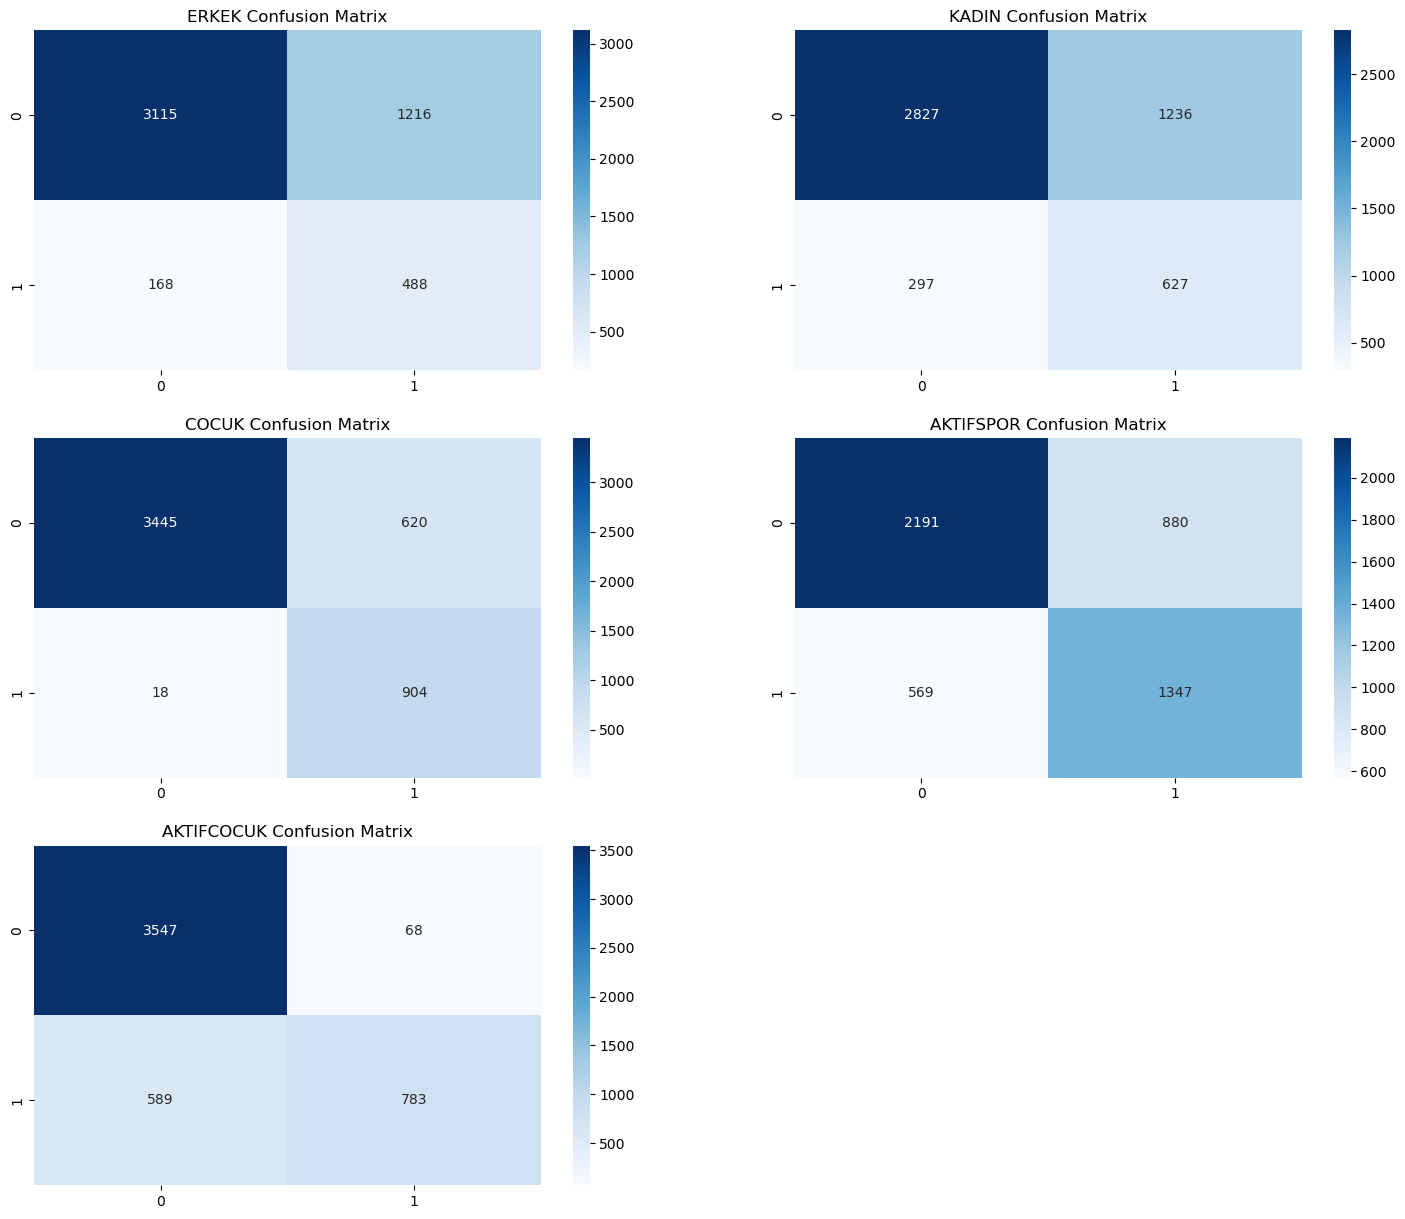

In [132]:
plt.figure(figsize = (18,15))

plt.subplot(3, 2, 1,)
cm = confusion_matrix(new_df["ERKEK_PREDİCT"],new_df["ERKEK_ACTUAL"])
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title(f'ERKEK Confusion Matrix')
    # Doğruluk oranlarını hesaplıyoruz
true_positive_rate = cm[0][0] / (cm[0][0] + cm[0][1])
false_positive_rate = cm[1][0] / (cm[1][0] + cm[1][1])

print(f'ERKEK True Positive Rate: {true_positive_rate:.2f}')
print(f'ERKEK False Positive Rate: {false_positive_rate:.2f}')
print()

plt.subplot(3, 2, 2)
cm = confusion_matrix(new_df["KADIN_PREDİCT"],new_df["KADIN_ACTUAL"])
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title(f'KADIN Confusion Matrix')
    # Doğruluk oranlarını hesaplıyoruz
true_positive_rate = cm[0][0] / (cm[0][0] + cm[0][1])
false_positive_rate = cm[1][0] / (cm[1][0] + cm[1][1])
print(f'KADIN True Positive Rate: {true_positive_rate:.2f}')
print(f'KADIN False Positive Rate: {false_positive_rate:.2f}')
print()


plt.subplot(3, 2, 3)
cm = confusion_matrix(new_df["COCUK_PREDİCT"],new_df["COCUK_ACTUAL"])
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title(f'COCUK Confusion Matrix')
    # Doğruluk oranlarını hesaplıyoruz
true_positive_rate = cm[0][0] / (cm[0][0] + cm[0][1])
false_positive_rate = cm[1][0] / (cm[1][0] + cm[1][1])
print(f'COCUK True Positive Rate: {true_positive_rate:.2f}')
print(f'COCUK False Positive Rate: {false_positive_rate:.2f}')
print()

plt.subplot(3, 2, 4)
cm = confusion_matrix(new_df["AKTIFSPOR_PREDİCT"],new_df["AKTIFSPOR_ACTUAL"])
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title(f'AKTIFSPOR Confusion Matrix')
    # Doğruluk oranlarını hesaplıyoruz
true_positive_rate = cm[0][0] / (cm[0][0] + cm[0][1])
false_positive_rate = cm[1][0] / (cm[1][0] + cm[1][1])
print(f'AKTIFSPOR True Positive Rate: {true_positive_rate:.2f}')
print(f'AKTIFSPOR False Positive Rate: {false_positive_rate:.2f}')
print()

plt.subplot(3, 2, 5,)
cm = confusion_matrix(new_df["AKTIFCOCUK_PREDİCT"],new_df["AKTIFCOCUK_ACTUAL"])
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title(f'AKTIFCOCUK Confusion Matrix')
    # Doğruluk oranlarını hesaplıyoruz
true_positive_rate = cm[0][0] / (cm[0][0] + cm[0][1])
false_positive_rate = cm[1][0] / (cm[1][0] + cm[1][1])

print(f'AKTIFCOCUK True Positive Rate: {true_positive_rate:.2f}')
print(f'AKTIFCOCUK False Positive Rate: {false_positive_rate:.2f}')
print()

plt.show()